In [31]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [16]:
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

In [50]:

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
200/200 [==============================] - 1s 1ms/step - loss: 0.5141 - accuracy: 0.7498
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8895
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.8895
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.8925
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2504 - accuracy: 0.8975
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.9049
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2465 - accuracy: 0.9020
Epoch 8/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2314 - accuracy: 0.9061
Epoch 9/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2386 - accuracy: 0.9045
Epoch 10/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9099

In [51]:
keras_model??

In [22]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [40]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [44]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

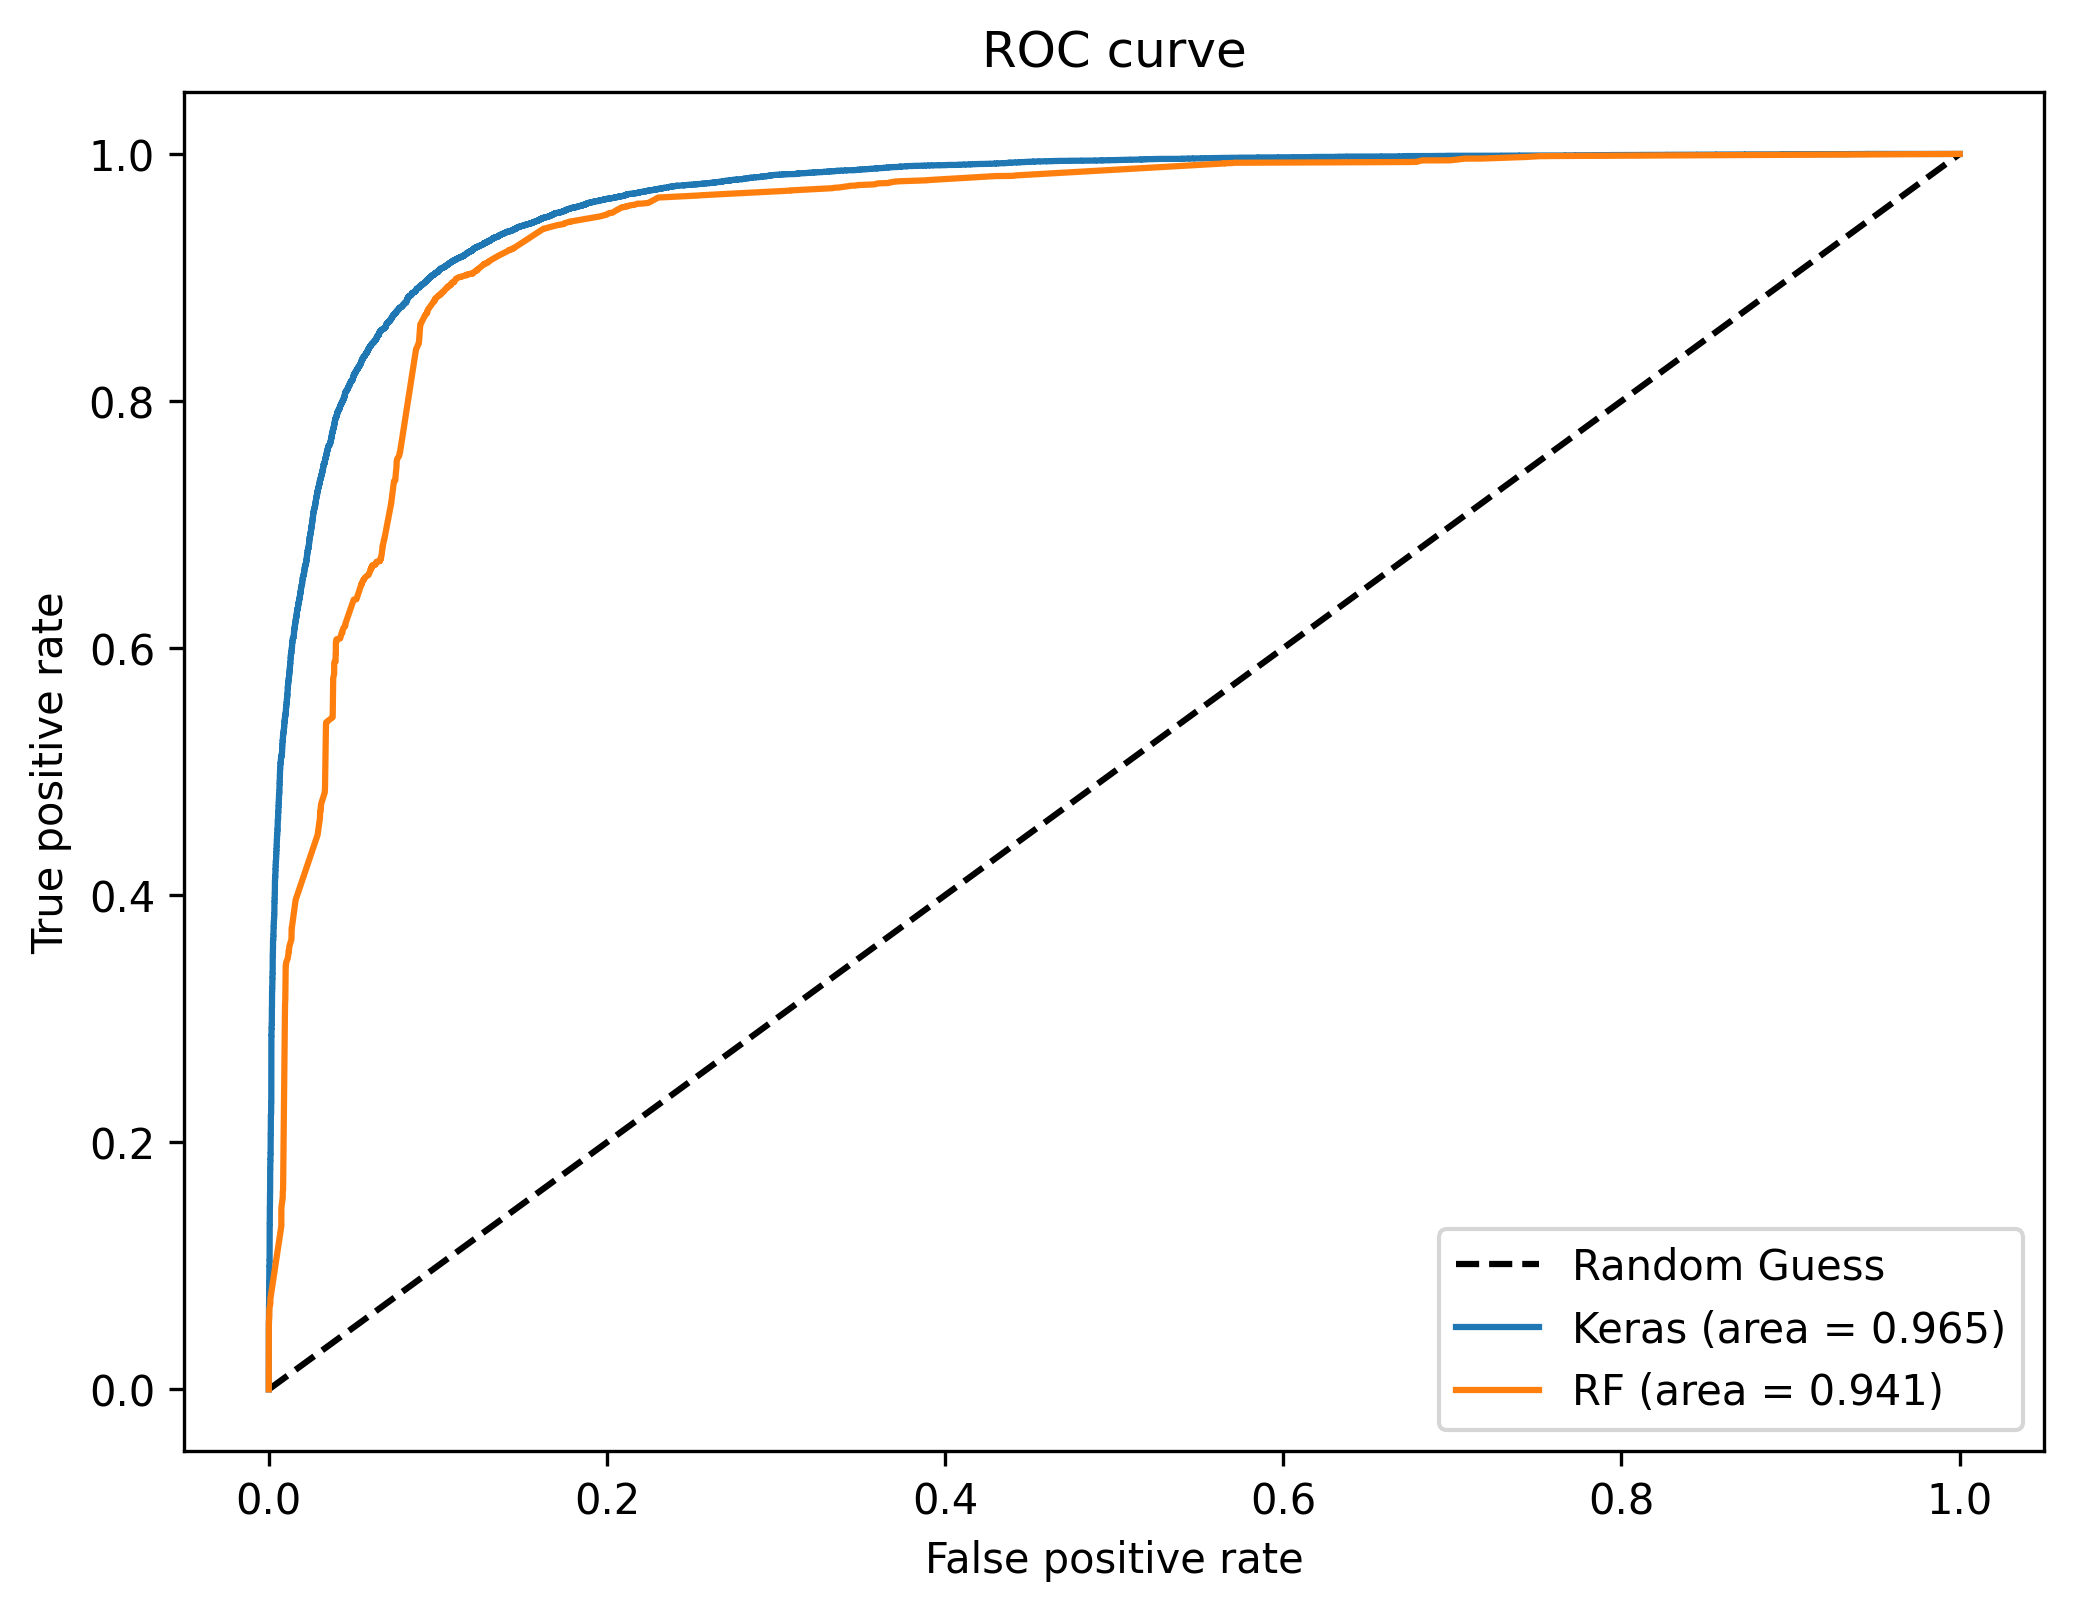

In [48]:
import matplotlib.pylab as plt  
fig= plt.figure(figsize=(8,6),dpi=300)
plt.plot([0, 1], [0, 1], 'k--',label="Random Guess")
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [8]:
epochs =  list(range(4,52,2))

In [12]:
list(range(4,33,4))

[4, 8, 12, 16, 20, 24, 28, 32]